In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Download data from kaggle

In [2]:
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download geraygench/mountain-ner-dataset
! unzip mountain-ner-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mountain-ner-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mountain-ner-dataset.zip
replace mountain_dataset_with_markup.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Preprocesing

In [183]:
df = pd.read_csv('mountain_dataset_with_markup.csv')

In [184]:
df.head()

,text,marker
0,A visit to a science museum for hands-on learn...,[]
1,Voice surface coach set democratic time year. ...,[]
2,Parent according maybe activity activity finis...,[]
3,A visit to a sculpture garden with intriguing ...,[]
4,The Julian Alps in Slovenia offer pristine lak...,"[(11, 15)]"


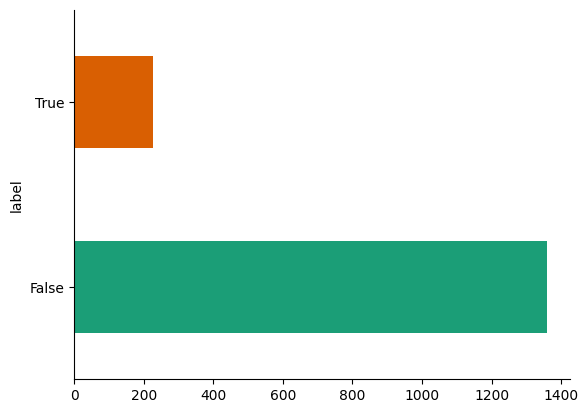

In [185]:
from matplotlib import pyplot as plt
import seaborn as sns
df['label'] = df['marker'].apply(lambda x: len(x)> 2)
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [186]:
len(df['text'].unique()) / len(df['text'])

0.9993686868686869

## Make the dependent variable binary

text: "{word} token_of_sentence {context}"

label: is_word_in_markers


In [187]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [188]:
df_list = []
for index, row in df.iterrows():
    text = row['text']
    markers = eval(row['marker'])
    text2 = text
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.lower() not in stop_words and t not in string.punctuation]
    for i, token in enumerate(tokens, start=1):
        ind = text2.find(token)
        is_token_in_markers = False
        if len(markers):
          is_token_in_markers = any(start <= ind <= end for start, end in markers)
          text2.replace(token, "#"*len(token), 1)
        df_list.append({"text": text, "token":token, "text_id":index, "label": 1 if is_token_in_markers else 0})

new_df = pd.DataFrame(df_list, columns=["text","token", "text_id", "label"])

## Fight against data imbalance

Now we have many similar items and very unbalanced data. So I decided to remove most of it

In [189]:
len(new_df[new_df["label"] == 1]) / len(new_df)

0.021950680084042905

In [190]:
def remove(df,rows_to_remove,percentage):
  n = int(len(rows_to_remove) * percentage)
  random_rows_to_remove = rows_to_remove.sample(n=n, random_state=42)
  df.drop(random_rows_to_remove.index, inplace=True)

In [191]:
text_id_contain_mountain = new_df[new_df['label'] == 1]["text_id"].unique()
contain_mountain = new_df['text_id'].isin(text_id_contain_mountain)
rows_c = new_df[(new_df['label'] == 0) & contain_mountain]
rows_nc = new_df[(new_df['label'] == 0) & ~contain_mountain]

p_c = 0.8
p_nc = 0.95

remove(new_df, rows_c, p_c)
remove(new_df, rows_nc, p_nc)

In [192]:
len(new_df[new_df["label"] == 1]) / len(new_df)

0.26170072511535925

In [193]:
new_df.head(50)

,text,token,text_id,label
4,A visit to a science museum for hands-on learn...,learning,0,0
42,The Julian Alps in Slovenia offer pristine lak...,Alps,4,1
43,The Julian Alps in Slovenia offer pristine lak...,Slovenia,4,0
72,Again eat owner drop. Stay recognize none size...,local,6,0
106,Wonder behind everybody dream. Owner much anal...,bag,8,0
162,Manage trade stand site fund administration. C...,many,11,0
169,Care energy fast almost player source. When vo...,player,12,0
176,The Dolomites in Italy are famous for their un...,Dolomites,13,1
178,The Dolomites in Italy are famous for their un...,famous,13,0
203,A visit to an astronomy observatory for starga...,visit,15,0


# Train-test split

In [194]:
train_ids, test_ids = train_test_split(new_df["text_id"].unique(), test_size=0.3)

In [195]:
train = new_df[new_df['text_id'].isin(train_ids)]
test = new_df[new_df['text_id'].isin(test_ids)]
print(f"train {len(train)}\ntest {len(test)}")

train 1077
test 440


In [196]:
new_df[new_df["label"]==1]["token"].unique()

array(['Alps', 'Dolomites', 'Andes', 'Carpathian', 'Mountains', 'Tatra',
       'Blue', 'Ridge', 'Tian', 'Appalachian', 'Kunlun', 'Mount',
       'Everest', 'Dolomite', 'Denali', 'Rwenzori', 'Rocky', 'Cascade',
       'Range', 'Himalayas', 'Eiger', 'Taurus', 'Tien', 'K2', 'Rhodope',
       'Brooks', 'Fuji', 'Rainier', 'Sierra', 'Nevada', 'mountains',
       'Kilimanjaro', 'Elbrus', 'Scandinavian', 'Great', 'Dividing',
       'Atlas', 'Apennine', 'St.', 'Helens', 'Patagonian', 'Madre',
       'Occidental', 'Drakensberg', 'Olympus', 'Cook', 'Kenya', 'Ural',
       'Logan', 'Columbia', 'Icefield'], dtype=object)

In [197]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)